# Exploratory Data Analysis (EDA)

This notebook explores the thermographic and electrical data used for fault detection.
The goal is to understand data structure, distributions, and potential challenges before model training.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [21]:
data_path = "../data/dataset_thermography_Electricity.csv"
df = pd.read_csv(data_path)


In [8]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Columns: 76816 entries, temp_0_0 to m_falla
dtypes: float64(76815), object(1)
memory usage: 38.1+ MB


In [7]:
df.shape

(65, 76816)

In [10]:
df.isnull().sum().sort_values(ascending=False).head(10)

temp_318_127    4
temp_319_127    4
temp_318_128    4
temp_319_128    4
temp_319_239    3
temp_318_164    3
temp_319_163    3
temp_318_163    3
temp_319_164    3
temp_319_158    3
dtype: int64

In [12]:
df['m_falla'].value_counts(normalize=True)

m_falla
Contactos flojos    0.553846
Normal              0.446154
Name: proportion, dtype: float64

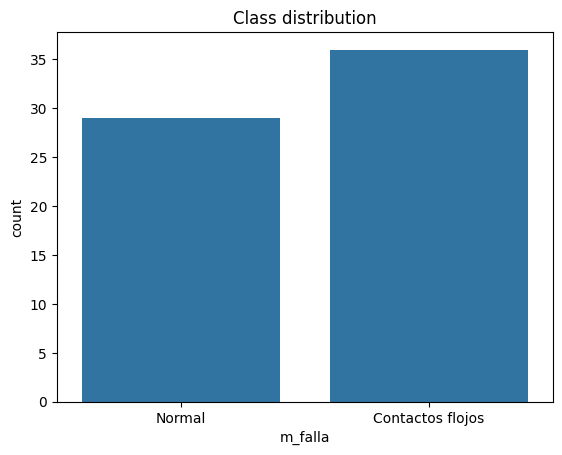

In [14]:
sns.countplot(x='m_falla', data=df)
plt.title("Class distribution")
plt.show()


In [22]:
df = df.dropna()

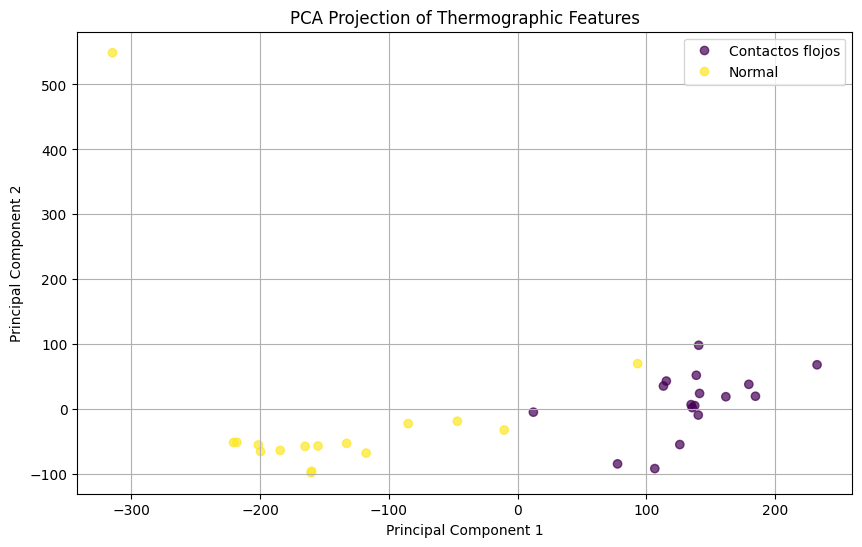

In [29]:
features = df.drop(columns='m_falla')
target_text = df['m_falla']
le = LabelEncoder()
target_numeric = le.fit_transform(target_text)

X_scaled = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=target_numeric, cmap='viridis', alpha=0.7)
plt.legend(handles=scatter.legend_elements()[0], labels=list(le.classes_))
plt.title("PCA Projection of Thermographic Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

## Key Insights

- The dataset presents high dimensionality compared to sample size
- Significant noise is observed in thermographic matrices
- Tree-based models are expected to perform better than deep architectures
- Results justify the selection of XGBoost for fault detection